0.13026666666666667 0.1383 0.0
0.9030666666666667 0.9066 1.0
0.9238 0.925 2.0
0.9361833333333334 0.935 3.0
0.9447333333333333 0.9441 4.0
0.9509 0.9489 5.0
0.95485 0.9528 6.0
0.9614333333333334 0.9581 7.0
0.9638166666666667 0.9605 8.0
0.9667 0.9623 9.0
0.9695 0.9664 10.0
0.9704166666666667 0.9664 11.0
0.9731 0.9675 12.0
0.9727166666666667 0.9683 13.0
0.9762833333333333 0.9695 14.0
0.9785833333333334 0.9705 15.0
0.97735 0.9689 16.0


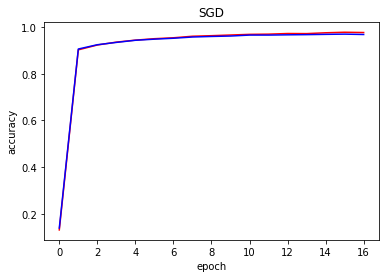

In [1]:
import sys, os

sys.path.append(os.pardir)

from dataset.mnist import load_mnist
from project1.network import Network
import numpy as np
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = Network(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 훈련 / 테스트
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 랜덤 선택
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 갱신 ([손실함수 기울기 * 학습률]을 이용)
    grad = network.gradient(x_batch, t_batch)
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 에폭마다 기록하기
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc, i / iter_per_epoch)

# 그래프로 나타내기
plt.title("SGD")
plt.plot(train_acc_list, color="red")
plt.plot(test_acc_list, color="blue")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()
